# The network of migration in the SF Bay Area

This notebook shares code to create a plot of migration flows in the San Francisco Bay Area. I show how to use python's networkx library to plot a network of migration flows. You can find the jupyter notebook on my [github page]( https://github.com/higginsbrian). 

The most interesting result from this exercise is that most moves in the Bay Area come from outside the Bay Area, rather than from moves between the counties within the Bay Area. 

I use data from the American Community Survey. 

This is an early part of research by Brian Higgins and Boaz Abramson. Keep posted for the full paper. 

In [6]:
import numpy as np
from numba import njit

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline


## Import data and create graph
We import the data using pandas. The raw data is a spreadsheet which includes the proportion of moves to county A that come from county B, and vice versa. We include the nine counties of the Bay Area and an extra group, *Outside*, which captures all moves to-from outside the Bay. This dataset was produced from the American Community Survey, which provides county to county moves for every county in the US.

You can see the basic structure of the data printed below. 

In [14]:
#import data
data = pd.read_excel("../../3.data/County_Migration/phi.xls")
data.head()

,fipsnameA,fipsnameB,phi_A_to_B,phi_B_to_A,phi_outside_to_A
0,Alameda County,Contra Costa County,0.174173,0.089990,NaN
1,Alameda County,Marin County,0.009427,0.009988,NaN
2,Alameda County,Napa County,0.001419,0.002497,NaN
3,Alameda County,Outside,0.609082,0.636497,0.208529
4,Alameda County,San Francisco County,0.055124,0.100431,NaN


We use python's networkx class to convert our data to a graph. The *nodes* of the graph are the counties and the *edges* links if there is migration between any two counties. In fact, this is a weighted directed graph because the edges indicate the proportion of migrations into a county from another county. 

We can also convert this graph into the adjacency matrix, which we denote $\phi$. 

In [15]:
#define a directed graph
DG = nx.from_pandas_edgelist(df=data, source='fipsnameB', target='fipsnameA', edge_attr=['phi_B_to_A'],create_using=nx.DiGraph)
phi     = nx.to_numpy_array(DG,  dtype=None, nodelist=('Contra Costa County', 'Alameda County', 'Marin County', 'Napa County',  'San Francisco County', 'San Mateo County', 'Santa Clara County', 'Solano County', 'Sonoma County','Outside'), weight='phi_B_to_A', nonedge=0.0)

# create list of names which will be useful later
names = ['Con', 'Ala', 'Mar', 'Napa',  'SS', 'SM', 'SC', 'Sol', 'Son','Out']
names_long = ['Contra', 'Alameda', 'Marin', 'Napa',  'SF', 'Mateo', 'Clara', 'Solano', 'Sonoma','Outside']

## Plot the network
Once we've created a graph in networkx, we can easily plot the links using *matplotlib.pyplot*. The size of the link in the plot represents the proportion of moves flowing into each county. It's clear that most flows come from outside the Bay Area. 

I also print the adjacency matrix so that you can see the underlying numbers. 

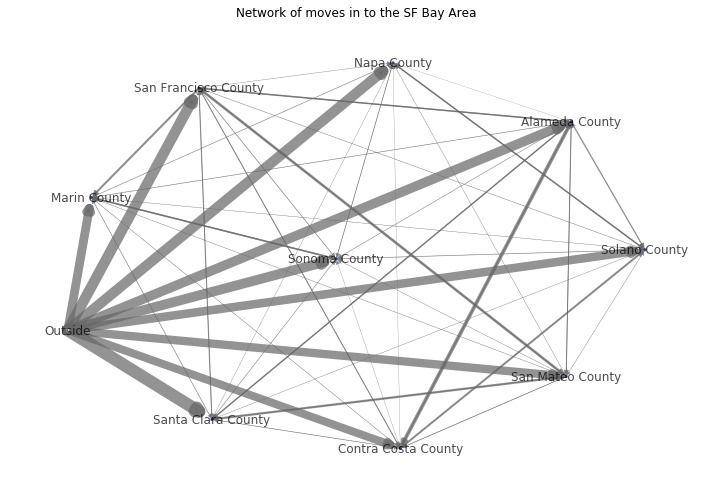

In [16]:
plt.figure(figsize =(10, 7)) 
node_color = [DG.degree(v) for v in DG] 
node_size = [5 for v in DG]  
edge_width = [15 * DG[u][v]['phi_B_to_A'] for u, v in DG.edges()] 
# width of edge is a list of weight of edges 
  
nx.draw_networkx(DG, node_size = node_size,  
                 node_color = node_color, alpha = 0.7, 
                 with_labels = True, width = edge_width, 
                 edge_color ='.4', cmap = plt.cm.Blues) 
plt.title('Network of moves in to the SF Bay Area')
  
plt.axis('off') 
plt.tight_layout(); 
plt.savefig('network_BayArea.png')

In [17]:
# put phi matrix in a dataframe to make it easier to print with name
df_phi = pd.DataFrame(phi, index=names_long, columns=names_long)
df_phi[['Contra', 'Alameda', 'Marin', 'Napa',  'SF', 'Mateo', 'Clara', 'Solano', 'Sonoma']].style.background_gradient(cmap='Blues')

,Contra,Alameda,Marin,Napa,SF,Mateo,Clara,Solano,Sonoma
Contra,0.000000,0.089990,0.032527,0.019764,0.027431,0.030377,0.014877,0.133554,0.017528
Alameda,0.248406,0.000000,0.043402,0.017539,0.078392,0.066450,0.064264,0.084614,0.037887
Marin,0.011300,0.009988,0.000000,0.043063,0.019282,0.006190,0.004378,0.024208,0.100516
Napa,0.002780,0.002497,0.006047,0.000000,0.000512,0.002118,0.000078,0.082288,0.027029
SF,0.071215,0.100431,0.136399,0.031414,0.000000,0.178455,0.027508,0.032987,0.047892
Mateo,0.045639,0.047360,0.032527,0.031283,0.069429,0.000000,0.057383,0.029842,0.029860
Clara,0.045216,0.095879,0.048522,0.028141,0.076871,0.151389,0.000000,0.030694,0.042308
Solano,0.032314,0.010111,0.013264,0.095942,0.009099,0.004669,0.002979,0.000000,0.044325
Sonoma,0.009412,0.007246,0.099776,0.045681,0.011238,0.004483,0.003721,0.012546,0.000000
Outside,0.533719,0.636497,0.587535,0.687173,0.707746,0.555869,0.824813,0.569267,0.652654
